# <center> World Income Inequality Analysis

### About the Data
The data is taken from UN's World Income Inequality Database, and is publicly available at: https://www.wider.unu.edu/database/wiid
Multiple datasets are available, providing the Global Inequality, Country-wise Inequality and Raw Data, without adjustments (such as equivalence scale, measure of resource etc)<br />

Income Inequality has been a part of the major political discourse in the US for the past few years, and the term is thrown around quite a lot around elections years, and how the top 1% have had a massive wealth increase, while the bottom 90% have had a minimal increase over the past 30-40 years. <br />
The goal here is to use this comprehensive data on inequality, and study the trends, as well as find any underlying correlation with other Macroeconomic indicators such as Revenue Generation, GDP Growth, GDP, Trade Deficit, Poverty, Unemployment, Population growth, Per Captia Income and others such as Gender wage gap, Health Inequality, Literacy, Corruption, Human Development Index, Crime Rate, Demographics, Urban/Rural ratio, Form of Government (Democracy/ Monarchy/Dictatorship etc), Social Unrest, etc. 
The aim of this is to use the data, and find the trends and indicators that have enabled countries to takle the issue of income inequality (for those who have), such as the impact Gender Wage Gap has on income inequality

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#### First we'll study the global inequality, but before that, the metrics to represent income inequality:

Gini Coefficient: The Gini coefficient is based on the comparison of cumulative proportions of the population against cumulative proportions of income they receive, and it ranges between 0 in the case of perfect equality and 1 in the case of perfect inequality. <br />
S80/S20: It's the ratio of the average income of the 20% richest to the 20% poorest.<br />
P90/P10: It's the ratio of the upper bound value of the ninth decile (i.e. the 10% of people with highest income) to that of the first decile.<br />
P90/P50: It's the upper bound value of the ninth decile to the median income. <br />
P50/P10: It's the median income to the upper bound value of the first decile.<br />
Palma ratio: The Palma ratio is the share of all income received by the 10% people with highest disposable income divided by the share of all income received by the 40% people with the lowest disposable income.

In [3]:
#Loading the first dataset

In [5]:
df_g = pd.read_excel('Datasets/wiidglobal.xlsx')

In [6]:
df_g.head()

,area,subarea,country,c3,interpolated,id,region_wb,incomegroup,year,population,...,y91,y92,y93,y94,y95,y96,y97,y98,y99,y100
0,World,World,World,NaN,NaN,NaN,All regions,All income groups,1950,2.525275e+09,...,11051.41,11794.54,12738.03,13863.60,15264.11,16903.30,19195.51,22618.96,28677.74,49381.82
1,World,World,World,NaN,NaN,NaN,All regions,All income groups,1951,2.573144e+09,...,11486.86,12362.59,13346.06,14450.89,15912.68,17740.05,20109.70,23353.19,29210.59,49957.81
2,World,World,World,NaN,NaN,NaN,All regions,All income groups,1952,2.620139e+09,...,11754.84,12617.83,13576.70,14722.83,16263.74,18162.72,20465.87,23819.78,30005.48,52372.04
3,World,World,World,NaN,NaN,NaN,All regions,All income groups,1953,2.666948e+09,...,12230.80,13162.01,14167.95,15410.25,17007.44,18958.65,21402.71,24870.97,31234.54,51603.16
4,World,World,World,NaN,NaN,NaN,All regions,All income groups,1954,2.714142e+09,...,12488.59,13296.76,14346.36,15568.41,17118.18,19128.19,21553.90,25106.00,31671.55,53208.86


In [8]:
df_g.describe()

,id,year,population,gdp,gini,gem1,ge0,ge1,ge2,a025,...,y91,y92,y93,y94,y95,y96,y97,y98,y99,y100
count,2109.000000,15750.000000,1.568000e+04,15680.000000,15750.000000,15750.000000,15750.000000,15750.000000,15750.000000,15750.000000,...,15470.000000,15470.000000,15470.000000,15470.000000,15470.000000,15470.000000,15470.000000,15470.000000,15470.000000,15470.000000
mean,10377.444761,1984.500000,1.534590e+08,13536.265874,44.547633,86.574874,39.948471,40.719070,73.190903,9.696319,...,25580.402545,26741.201643,28082.000385,29844.955489,32045.703414,35449.441727,39437.000202,45085.505677,54323.494756,84397.500303
std,6083.643319,20.205839,7.236752e+08,19046.406638,11.889166,110.494210,23.810886,23.645536,64.986440,6.392372,...,34865.186406,36039.839012,37356.561832,39121.508016,41373.037705,44751.265844,48830.316006,54871.567307,64696.120330,96279.977414
min,1.000000,1950.000000,1.490000e+00,312.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,17.280000,17.280000,17.280000,17.280000,17.280000,17.280000,17.280000,17.280000,17.280000,17.280000
25%,5228.000000,1967.000000,7.444635e+05,2686.162500,35.560000,27.276000,22.146000,22.118250,27.812000,5.379750,...,5377.932500,5715.272500,6109.250000,6629.515000,7263.800000,8358.210000,9526.527500,11205.430000,13999.822500,23068.920000
50%,10832.000000,1984.500000,4.721904e+06,6619.910000,43.947000,49.317000,34.167500,35.843000,52.902000,8.388000,...,13146.485000,13883.310000,14751.385000,15919.740000,17359.760000,19580.295000,22142.245000,25654.200000,31541.630000,51361.725000
75%,15269.000000,2002.000000,1.895280e+07,16144.922500,53.331000,91.418250,52.936250,56.335750,102.546250,12.931250,...,31961.310000,33597.212500,35519.907500,37847.952500,40875.837500,45330.575000,50909.777500,58427.027500,70494.080000,110098.115000
max,20792.000000,2019.000000,7.684304e+09,227110.670000,77.122000,1049.124000,136.548000,141.681000,495.968000,72.256000,...,411193.670000,418009.040000,424824.400000,431639.770000,442998.710000,467911.160000,503904.320000,550483.710000,620352.800000,894377.200000


In [10]:
# For the purpose of this task, we'll be using Population, GDP, Gini, Palma Ratio, Middle 50, bottom 5, and top5 among the numerical variables
sel_columns = ['area', 'subarea' , 'country' ,	 'c3', 'interpolated' ,	 'id', 	 'region_wb',  'incomegroup',	'year',	 'population', 'gdp', 'gini', 'palma', 'middle50', 'bottom5', 'top5']

df_g1 = df_g[sel_columns]

In [14]:
df_g1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15750 entries, 0 to 15749
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area          15750 non-null  object 
 1   subarea       15750 non-null  object 
 2   country       15750 non-null  object 
 3   c3            14630 non-null  object 
 4   interpolated  14630 non-null  object 
 5   id            2109 non-null   float64
 6   region_wb     15470 non-null  object 
 7   incomegroup   15260 non-null  object 
 8   year          15750 non-null  int64  
 9   population    15680 non-null  float64
 10  gdp           15680 non-null  float64
 11  gini          15750 non-null  float64
 12  palma         15750 non-null  float64
 13  middle50      15750 non-null  float64
 14  bottom5       15750 non-null  float64
 15  top5          15750 non-null  float64
dtypes: float64(8), int64(1), object(7)
memory usage: 1.9+ MB


In [13]:
#This contains Country Wise Data as well as Global Data. Let's see how Global inequality has fared in the past few decades.

In [16]:
df_global = df_g1[df_g1['subarea'] == 'World']

In [19]:
df_global.shape

(70, 16)

In [27]:
# So, we have Global inequality data over the course of 70 years (1950 - 2019)
# We'll drop some of the columns that contain categorical data not needed (It doesn't vary for our data)
columns_del = ['subarea', 'country', 'c3', 'interpolated', 'id', 'region_wb', 'incomegroup']
df_glb_1 = df_global.drop(columns_del, axis =1 )

### Plotting Global Inequality

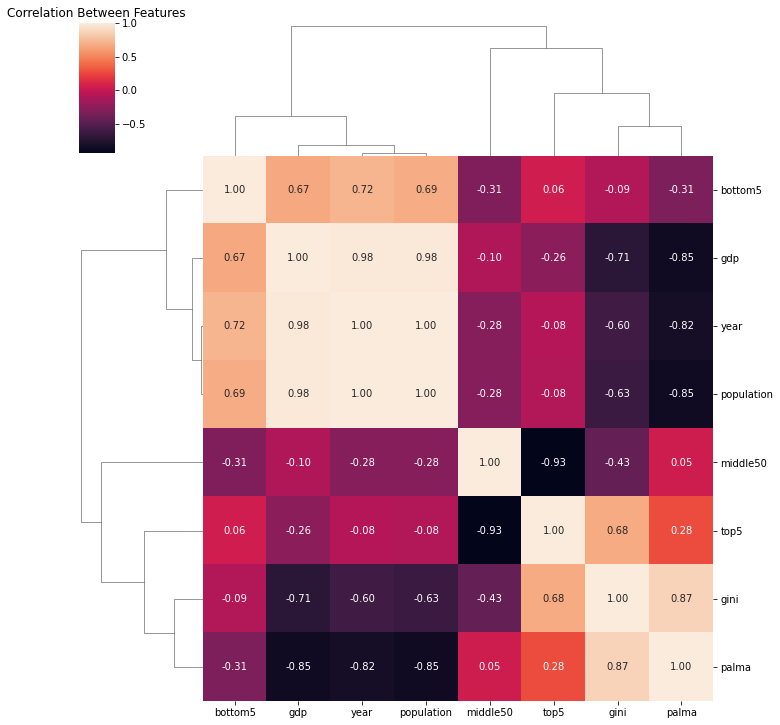

In [30]:
# Correlation between features
correl_1 = df_glb_1.corr()
sns.clustermap(correl_1, annot = True, fmt = '.2f', figsize = (10, 10))
plt.title("Correlation Between Features")
plt.show()

### Some interesting insights from this data are: 
High negative correlation between GDP & Population and Palma Ratio. <br/>
There is however poor correlation between top5 and bottom 5. 

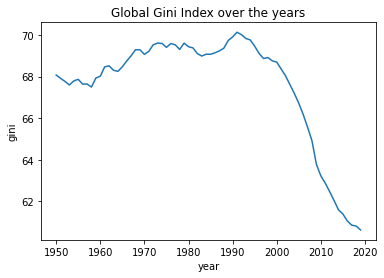

In [41]:
# Next, we'll see the trends in Global Inequality over the last 7 decades. 
sns.lineplot(data= df_glb_1, x = 'year', y ='gini')
plt.title('Global Gini Index over the years')
plt.show()
# Global Inequality has decreased over the years. 

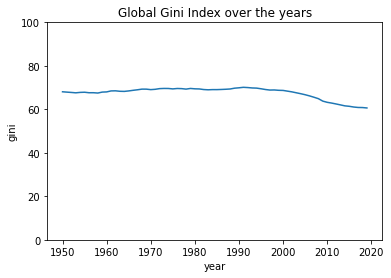

In [42]:
#The above graph is a bit misleading, and to put things in perspective, here's Gini Index over the Years when shown over the complete range on yaxis. 
sns.lineplot(data= df_glb_1, x = 'year', y ='gini')
plt.ylim(0,100)
plt.title('Global Gini Index over the years')
plt.show()


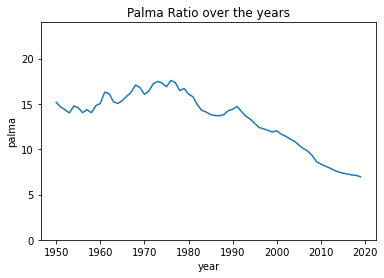

In [45]:
sns.lineplot(data = df_glb_1, x= 'year', y = 'palma')
plt.title('Palma Ratio over the years')
plt.ylim(0, 24)
plt.show()
# Ideally, Palma Ratio should be 1 or below.

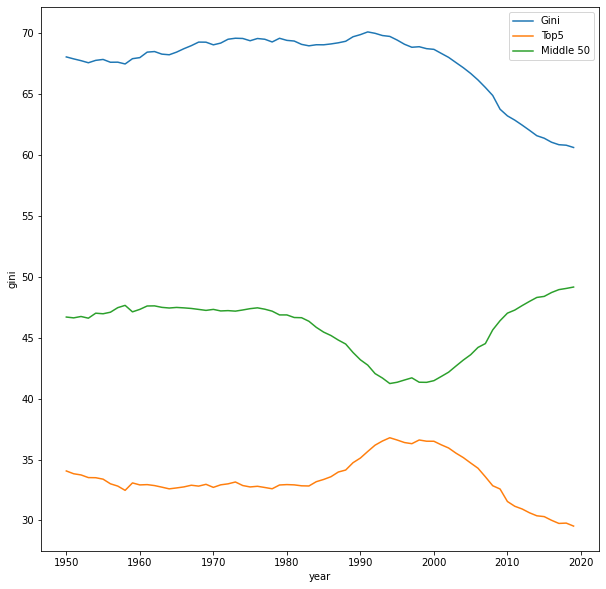

In [64]:
plt.rcParams['figure.figsize'] = (10,10)

sns.lineplot(data = df_glb_1, x= 'year', y = 'gini')
sns.lineplot(data = df_glb_1, x= 'year', y = 'top5')
sns.lineplot(data = df_glb_1, x= 'year', y = 'middle50')

plt.legend(labels=['Gini', 'Top5', 'Middle 50'])
plt.show()
#sns.lineplot()


### This is interesting to see, but let's look at how the stats have varied in North America. 

In [66]:
df_na = df_g1[df_g1['subarea'] == 'North America']


In [78]:
# So, we have North America's inequality data over the course of 70 years (1950 - 2019)
# We'll drop some of the columns that contain categorical data not needed (It doesn't vary for our data)
columns_del = ['subarea', 'country', 'c3', 'interpolated', 'id', 'region_wb', 'incomegroup']
df_na1 = df_na.drop(columns_del, axis =1 )
df_na1.isnull().any()

area          False
year          False
population    False
gdp           False
gini          False
palma         False
middle50      False
bottom5       False
top5          False
dtype: bool

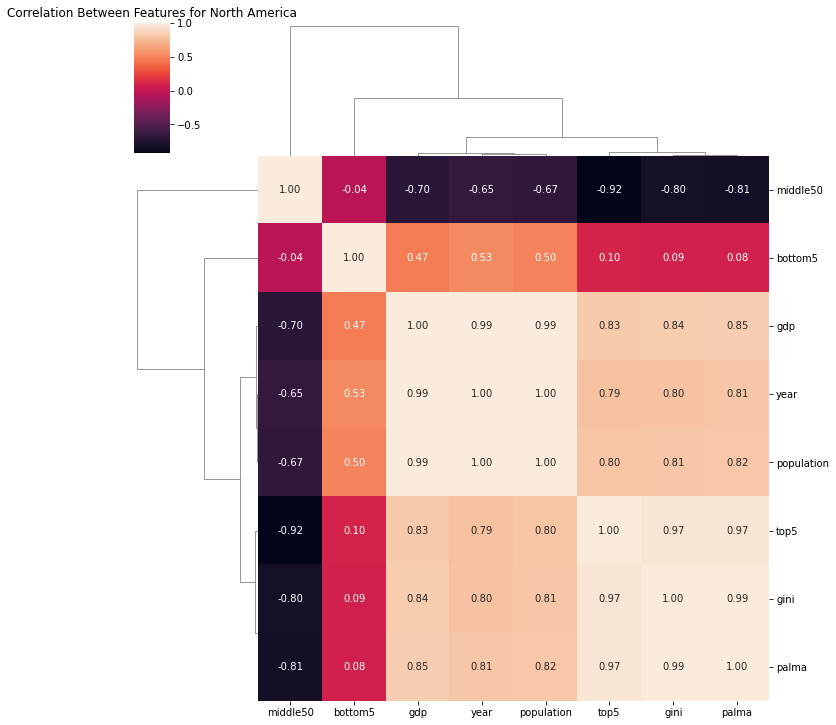

In [82]:
# Correlation between features
correl_na = df_na1.corr()
sns.clustermap(correl_na, annot = True, fmt = '.2f', figsize = (10, 10))
plt.title("Correlation Between Features for North America")
plt.show()

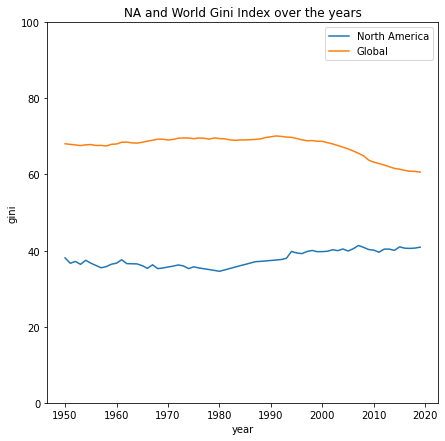

In [92]:
# Next, we'll see the trends in Global Inequality over the last 7 decades. 
plt.rcParams['figure.figsize'] = (7,7)
sns.lineplot(data= df_na1, x = 'year', y ='gini')
sns.lineplot(data= df_glb_1, x = 'year', y ='gini')
plt.legend(labels=['North America', 'Global'])
plt.title('NA and World Gini Index over the years')
plt.ylim(0, 100)
plt.show()


Even though absolute inequality in North America is lower than global inequality (Gini index), it has risen over the past 40 years.
Also, globally, gini index in negatively correlated with GDP, however in north america, it is positively correlated (0.84). Negative correlation is better since with increase in GDP, income inequality should decrease (ideally) 

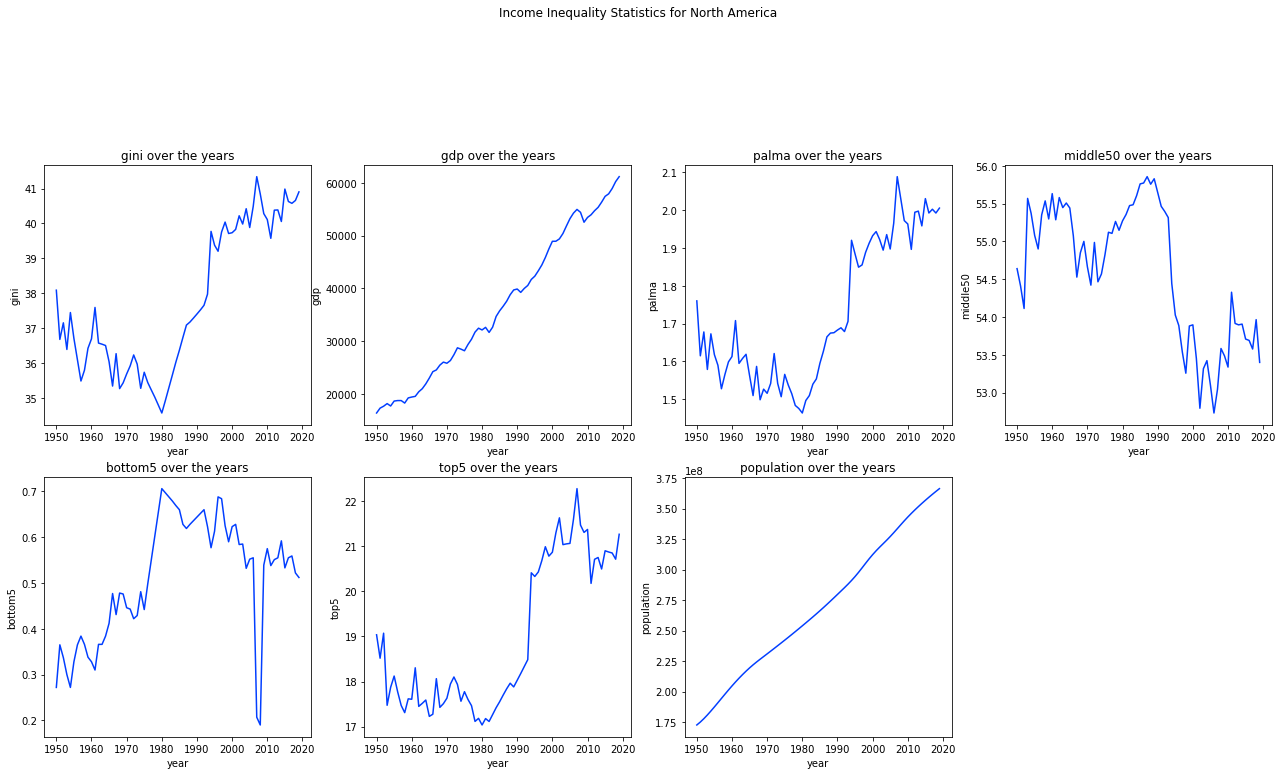

In [101]:
#Let's plot the below features and see their trend in North America over the years. 
plot_cols =  [ 'gini', 'gdp', 'palma', 'middle50', 'bottom5', 'top5', 'population']

fig =plt.figure(figsize= (22, 22) )
j = 0
sns.set_palette ('bright')
for i in plot_cols:
    plt.subplot(4, 4, j + 1)
    j+=1
    sns.lineplot(data = df_na1 ,  x = 'year', y =i )
    plt.title("{} over the years".format(i))
    
fig.suptitle('Income Inequality Statistics for North America')

#fig.tight_layout()
plt.show()

In [102]:
# This is clear from the above graphs that income inequality has increased over the years, particulalrly from 1980 onwards. 

# Income Inequality vs Poverty Rates

In [109]:
#For poverty rates, data is provided by world bank. 

df_pov = pd.read_csv('Datasets/Poverty/poverty_global.csv')

In [106]:
# First, we'll take the data for US

In [110]:
df_pov_us = df_pov[df_pov['Country Name'] == 'United States']

In [111]:
df_pov_us.shape

(29, 65)

In [117]:
df_pov_us_1 =  df_pov_us.iloc[2:3]

In [118]:
df_pov_us_1

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
7223,United States,USA,Poverty headcount ratio at $5.50 a day (2011 P...,SI.POV.UMIC,NaN,NaN,NaN,NaN,NaN,NaN,...,1.7,1.7,1.7,2.0,1.7,1.7,1.7,1.7,NaN,NaN


In [158]:
df_pov_us_x = df_pov_us_1.melt(id_vars = ['Country Name',	'Country Code'],
                var_name = 'Year',  
                value_name = 'Poverty Ratio')

In [159]:
df_pov_us_x.head()

,Country Name,Country Code,Year,Poverty Ratio
0,United States,USA,Indicator Name,Poverty headcount ratio at $5.50 a day (2011 P...
1,United States,USA,Indicator Code,SI.POV.UMIC
2,United States,USA,1960,NaN
3,United States,USA,1961,NaN
4,United States,USA,1962,NaN


In [197]:
# Now, we'll drop some columns
df_pov_us_p = df_pov_us_x[16:]

In [198]:
df_pov_us_p['Poverty Ratio'].fillna(method = 'ffill', inplace= True)

C:\Users\mamoo\AppData\Roaming\Python\Python37\site-packages\pandas\core\series.py:4469: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [195]:
#df_pov_us_p['Poverty Ratio'].fillna(method = 'ffill', inplace= True)

In [219]:
df_pov_us_p = df_pov_us_p.rename(columns={"Year":"year"})
df_pov_us_p = df_pov_us_p.drop(['Country Name', 'Country Code'], axis =1)
df_pov_us_p.head()


,year,Poverty Ratio
16,1974,1.7
17,1975,1.2
18,1976,1.2
19,1977,1.2
20,1978,1.2


In [224]:
df_pov_us_p['year'] = df_pov_us_p['year'].astype(str).astype(int)

In [201]:
# Now, we'll take the income inequality data and compare it with poverty data. 


In [203]:
df_usa_ie = df_g1[df_g1['country'] == 'United States']

In [213]:
df_usa_ie = df_usa_ie.reset_index()

In [214]:
columns_del_1 = ['index', 'subarea', 'area', 'c3', 'interpolated', 'id', 'region_wb', 'incomegroup']
df_usa_2 = df_usa_ie.drop(columns_del_1, axis =1 )

In [216]:
df_usa_2.head()

,country,year,population,gdp,gini,palma,middle50,bottom5,top5
0,United States,1950,158804384.0,16666.09,38.040,1.642,55.276,0.26,17.236
1,United States,1951,160872272.0,17633.90,36.486,1.513,55.150,0.36,16.745
2,United States,1952,163266032.0,17982.75,37.027,1.562,54.848,0.33,17.363
3,United States,1953,165910000.0,18500.01,36.164,1.474,56.406,0.29,15.651
4,United States,1954,168736384.0,18057.12,37.297,1.570,56.243,0.26,16.235


In [226]:
de_merged_us = pd.merge(df_usa_2, df_pov_us_p, on= 'year', how= 'inner')

In [229]:
# Now, we have poverty Ratio in the data frame. Let's see some trends

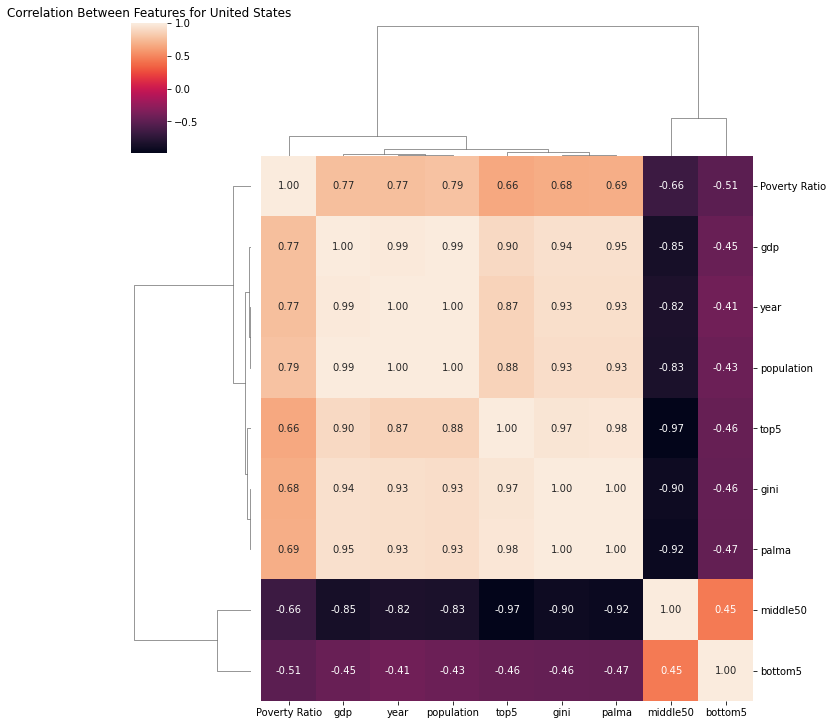

In [230]:
correl_us = de_merged_us.corr()
sns.clustermap(correl_us, annot = True, fmt = '.2f', figsize = (10, 10))
plt.title("Correlation Between Features for United States")
plt.show()

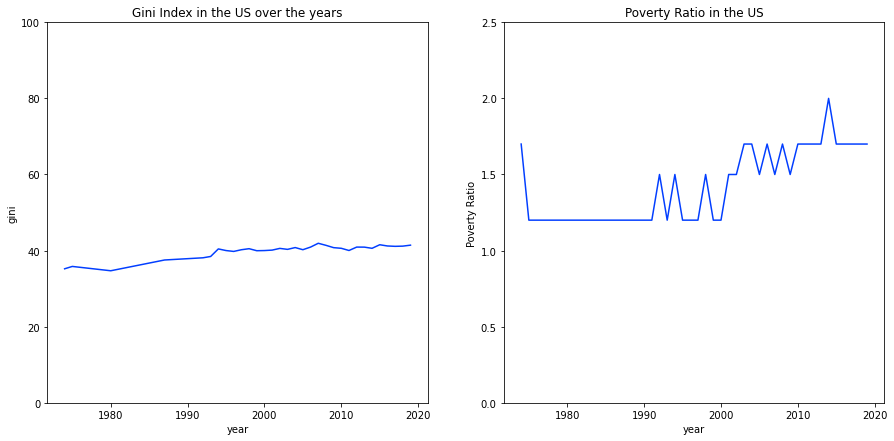

In [240]:
# Next, we'll see the trends in Global Inequality over the last 7 decades. 
plt.rcParams['figure.figsize'] = (15, 7)
plt.subplot(1, 2, 1)
sns.lineplot(data= de_merged_us, x = 'year', y ='gini')
plt.ylim(0, 100)

plt.title('Gini Index in the US over the years')
plt.subplot(1, 2, 2)
sns.lineplot(data= de_merged_us, x = 'year', y ='Poverty Ratio')
plt.ylim(0, 2.5)
plt.title('Poverty Ratio in the US')
plt.show()